In [1]:
from scripts import Visualization
import pandas as pd

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00J\xe7IDATx\x9c\xed\xddy|\\\xe5a\xee\xf1\xe7\x9cY\xa5\xd1\xbeX\x8bw\xcb\xf2\x86W\xbc\xb0\xd8\xd8&\xd8l\t\t\x01BH\x93\x12ZH\xda\xa4-\x90=\xbdI\x03\xe5\x86\xde6\x94\x94\xb4\x84\x84\x92\x86\x90\x84&d\x83\x10B\x00\xdb\xc1\x06\x0c^1\x18\xbco\xb2d\xcb\x96\xb5\xef\xb3\x9f\xfb\x87\x8c\xb0,\xc9\xab4gf\xce\xef\xfb\xf9\xe8#\xcf9\xef\x8c\x1e\xc9\xb2\xf5\xe8,\xefkX\x96e\t\x00\x00\x00\x8ea\xda\x1d\x00\x00\x00\x00\x89E\x01\x04\x00\x00p\x18\n \x00\x00\x80\xc3P\x00\x01\x00\x00\x1c\x86\x02\x08\x00\x00\xe00\x14@\x00\x00\x00\x87\xa1\x00\x02\x00\x008\x0c\x05\x10\x00\x00\xc0a(\x80\x00\x00\x00\x0eC\x01\x04\x00\x00p\x18\n \x00\x00\x80\xc3P\x00\x01\x00\x00\x1c\x86\x02\x08\x00\x00\xe00\x14@\x00\x00\x00\x87\xa1\x00\x02\x00\x008\x0c\x05\x10\x00\x00\xc0a(\x80\x00\x

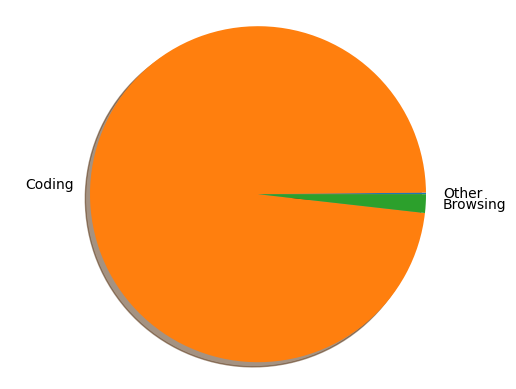

In [2]:
data_categories_for_pie_chart = pd.read_json("data/data_categories_for_pie_chart.json")["categories"]
Visualization.create_pie_diagram(data_categories_for_pie_chart)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00G\xf1IDATx\x9c\xed\xddy\x9c\x8du\xff\xc7\xf1\xf7\x99}_,\xb3ih,Y\xee0\x85\xdc\x83\x9b\x91\xd1\xb4\x10w\xeeV\xf7\x8d"\xbfBY\xb3\xdc\x14)\x91(\x91r\xa7Bw\xb4GE)\xd4\xe8.\x1a\xb2\x14\x1aSD\xdc\xcc\x8c\xee\x98\x19\x83Y\xcf\xf5\xfbcr\xccp\xce\xcc9fc\xae\xd7\xf3\xf18\x0f\xceu}\xaf\xef\xf9\x9e\xcfu\x9dk\xdes-g,\x86a\x18\x02\x00\x00\x80i\xb8\xd5\xf4\x00\x00\x00\x00P\xbd\x08\x80\x00\x00\x00&C\x00\x04\x00\x000\x19\x02 \x00\x00\x80\xc9\x10\x00\x01\x00\x00L\x86\x00\x08\x00\x00`2\x04@\x00\x00\x00\x93!\x00\x02\x00\x00\x98\x0c\x01\x10\x00\x00\xc0d\x08\x80\x00\x00\x00&C\x00\x04\x00\x000\x19\x02 \x00\x00\x80\xc9\x10\x00\x01\x00\x00L\x86\x00\x08\x00\x00`2\x04@\x00\x00\x00\x93!\x00\x02\x00\x00\x98\x0c\x01\x10\x00\x00\xc0d\x08\x80\x00\x00\x00&C\x00\x04\x00

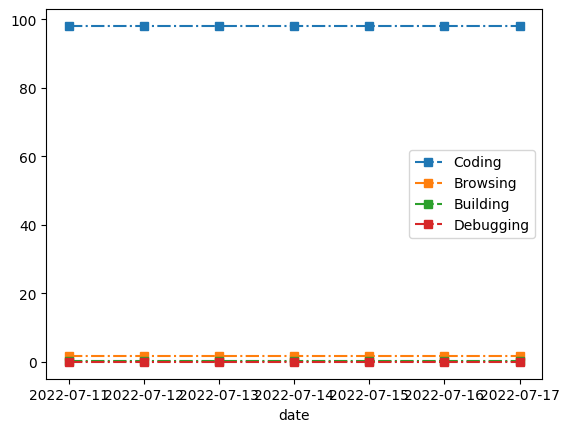

In [3]:
data_categories_for_bar_chart = pd.read_json("data/data_categories_for_bar_chart.json")["data"]
Visualization.create_bar_diagram(data_categories_for_bar_chart)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00L\x91IDATx\x9c\xed\xddyx]e\xa1\xf6\xff{\xed9\xd9;s\xd2&\xe9\x94\xce-\xa5\x13\x1d\xa0\x14h\x81\x02eR&\x01\x0f\xe7 \n\xe8\xf1\xe8A\x1c\xf0x^\x15\x14\xf5}\x7f2\xa8G\x11\xe5\x80\xe0\x84\x8a\x80(\x82\xccR\xa0-\x14Z\xda\x02\x9dh:%m3\xcf\xd9\xd9\xf3^\xbf?R\x02i\x92\x8e\xc9^;{}?\xd7\x95+\xcdZ+;w\xc7\xdc}\xd6z\x9e\xc70M\xd3\x14\x00\x00\x00l\xc3au\x00\x00\x00\x00\xa4\x16\x05\x10\x00\x00\xc0f(\x80\x00\x00\x006C\x01\x04\x00\x00\xb0\x19\n \x00\x00\x80\xcdP\x00\x01\x00\x00l\x86\x02\x08\x00\x00`3\x14@\x00\x00\x00\x9b\xa1\x00\x02\x00\x00\xd8\x0c\x05\x10\x00\x00\xc0f(\x80\x00\x00\x006C\x01\x04\x00\x00\xb0\x19\n \x00\x00\x80\xcdP\x00\x01\x00\x00l\x86\x02\x08\x00\x00`3\x14@\x00\x00\x00\x9b\xa1\x00\x02\x00\x00\xd8\x0c\x05\x10\x00\x00\xc0f(\x80\x00\x00\x00

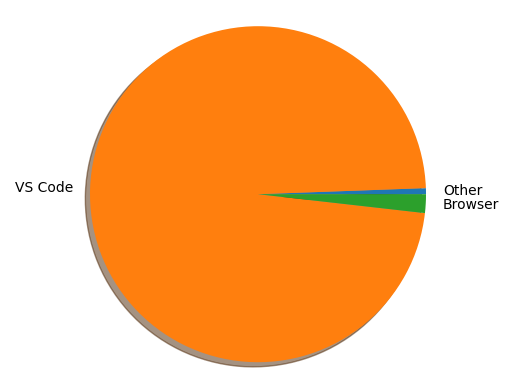

In [4]:
data_editors_for_pie_chart = pd.read_json("data/data_editors_for_pie_chart.json")["editors"]
Visualization.create_pie_diagram(data_editors_for_pie_chart)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00D\x8fIDATx\x9c\xed\xdd{\x9c\x8d\xe5\xfe\xff\xf1\xf7\x9a\xf3\x18s2\x99SNC1D\x081\xd8\r\x19\x8d\xdaD\xa9\x90\xbdQ\xa4\x03\xca\xa96?Q\xa4\xc8!*D\xb6C}c\x13\xbb\xc3N;\x92\x9c\xaa\xc9a::\x86\x882c\xda13f\x98\xe3\xba\x7f\x7fL\x96\x19\xd6\x9aY\x8b9\x98\xb9_\xcf\xc7c=X\xeb\xbe\xd6u_\xebs_s\xaf\xf7\xdc\xf7\xbd\xd6X\x0c\xc30\x04\x00\x00\x00\xd3p\xab\xe8\x01\x00\x00\x00\xa0|\x11\x00\x01\x00\x00L\x86\x00\x08\x00\x00`2\x04@\x00\x00\x00\x93!\x00\x02\x00\x00\x98\x0c\x01\x10\x00\x00\xc0d\x08\x80\x00\x00\x00&C\x00\x04\x00\x000\x19\x02 \x00\x00\x80\xc9\x10\x00\x01\x00\x00L\x86\x00\x08\x00\x00`2\x04@\x00\x00\x00\x93!\x00\x02\x00\x00\x98\x0c\x01\x10\x00\x00\xc0d\x08\x80\x00\x00\x00&C\x00\x04\x00\x000\x19\x02 \x00\x00\x80\xc9\x10\x00\x01\x00\x00L\x86\x00\x

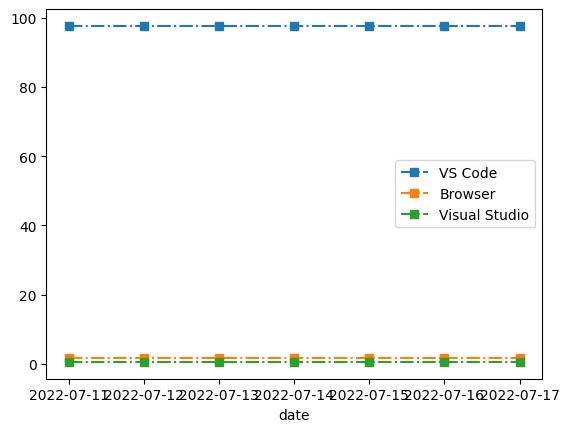

In [5]:
data_editors_for_bar_chart = pd.read_json("data/data_editors_for_bar_chart.json")["data"]
Visualization.create_bar_diagram(data_editors_for_bar_chart)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00|EIDATx\x9c\xed\xddw\x98T\xe5\xc1\xfe\xf1\xef\x99>\xb3\xb3}\xd9\x06[\xe8M\x9a\x05\x0b*v\xb1\x12+\xc6\x1e\xa3I\xde7\xfe\xde\x987\x9a\x98bML\xde\x18M\x8c\xd1\xa8\xd1\x08\xc6\x98h\x9a\xc6\xd8P\xb1\xa0\x80]\x04\x01\xe9\x9dea\xfb\xce\xcc\xee\xd4\xf3\xfbcau\xdd\xa5\xcf\xce\x99\xdd\xb9?\xd7\xb5\x170s\xe6\xcc\xbd\n\xc3\xcds\xce\xf3<\x86i\x9a&""""\x921lV\x07\x10\x11\x11\x11\x91\xd4R\x01\x14\x11\x11\x11\xc90*\x80""""\x19F\x05PDDD$\xc3\xa8\x00\x8a\x88\x88\x88d\x18\x15@\x11\x11\x11\x91\x0c\xa3\x02("""\x92aT\x00EDDD2\x8c\n\xa0\x88\x88\x88H\x86Q\x01\x14\x11\x11\x11\xc90*\x80""""\x19F\x05PDDD$\xc3\xa8\x00\x8a\x88\x88\x88d\x18\x15@\x11\x11\x11\x91\x0c\xa3\x02("""\x92aT\x00EDDD2\x8c\n\xa0\x88\x88\x88H\x86Q\x01\x14\x11\x11\x11\xc90*\x80""""\x19F\x05PDDD

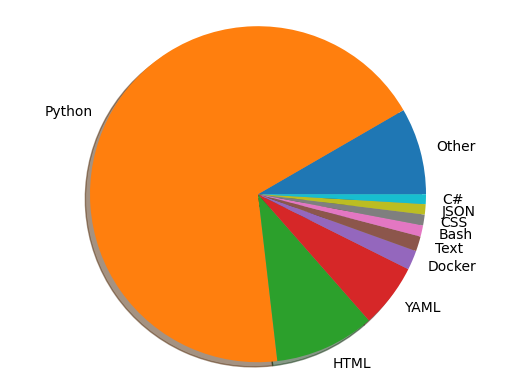

In [6]:
data_languages_for_pie_chart = pd.read_json("data/data_languages_for_pie_chart.json")["languages"]
Visualization.create_pie_diagram(data_languages_for_pie_chart)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00N\xf9IDATx\x9c\xed\xddyxSe\xfa\xff\xf1O\xd26m\xa1t\xa1\xd2\r\n\x14A\x01\x17DD\xac\x1b es\x19PTT\x10\x14\xd4\x19\xa7\xf8\x13\x1c\x9c\x91qAp\x14\xbe\x0e\n.(\xea`A\x05E\x18EE\x05\xa5\n\xb8\x14\x14\x14\x87MD\x04\xa9\xd0\x16\x15\xda\x02\xa5k\xce\xef\x8fJhJ\xd2\x9e@\xd2\x96\x9e\xf7\xeb\xbarA\xceyr\xe7\xc9}\x9e<\xb9{\xce\xc9\x89\xcd0\x0cC\x00\x00\x00\xb0\x0c{}w\x00\x00\x00\x00u\x8b\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x00\x01\x00\x00,\x86\x02\x10\x00\x00\xc0b(\x

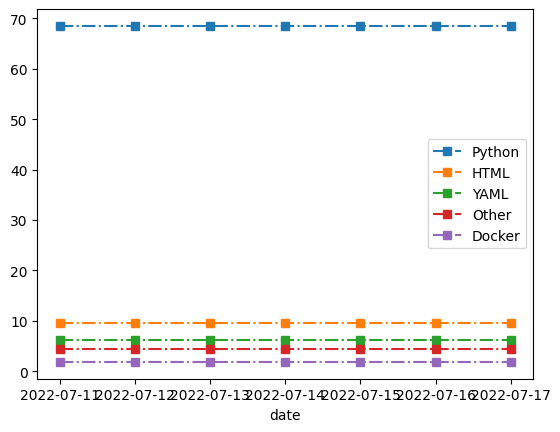

In [7]:
data_languages_for_bar_chart = pd.read_json("data/data_languages_for_bar_chart.json")["data"]
Visualization.create_bar_diagram_slice(data_languages_for_bar_chart)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00F\x9cIDATx\x9c\xed\xddwx\\\xe5\x81\xef\xf1\xdf\x99\xae\xde,\xab\xcb\xbd\xdb\x18\x1b\x1b\xd3\xdc\xe8\x04\x12JH\xe8\t\x17\xb8\xd9MB\xca\x86vsw\x93M\xd9\xbd\x9bK\xb2\xbb\xc9] \xec\xb2K \xbb,!\x85$\x94\x80\t\xc6\x06\xdb\x18\x17\\q\xc1\xddV\x97e\xf5\x19M?\xf7\x0f\x1b\x81\x91\x84-K\x9a33\xe7\xfby\x1e?\xb6\xce\x8cG?\xfb\x915?\xbf\xefy\xdf\xd70M\xd3\x14\x00\x00\x00l\xc3au\x00\x00\x00\x00$\x16\x05\x10\x00\x00\xc0f(\x80\x00\x00\x006C\x01\x04\x00\x00\xb0\x19\n \x00\x00\x80\xcdP\x00\x01\x00\x00l\x86\x02\x08\x00\x00`3\x14@\x00\x00\x00\x9b\xa1\x00\x02\x00\x00\xd8\x0c\x05\x10\x00\x00\xc0f(\x80\x00\x00\x006C\x01\x04\x00\x00\xb0\x19\n \x00\x00\x80\xcdP\x00\x01\x00\x00l\x86\x02\x08\x00\x00`3\x14@\x00\x00\x00\x9b\xa1\x00\x02\x00\x00\xd8\x0c\x05\x10\x00\x

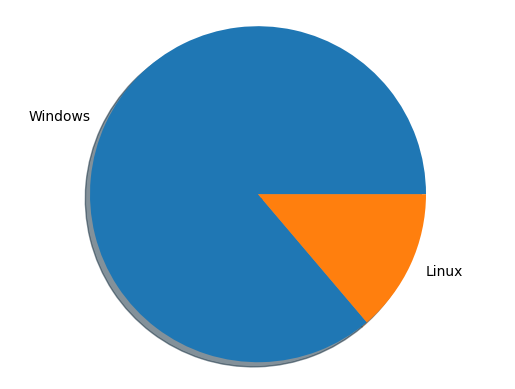

In [8]:
data_operating_systems_for_pie_chart = pd.read_json("data/data_operating_systems_for_pie_chart.json")["operating_systems"]
Visualization.create_pie_diagram(data_operating_systems_for_pie_chart)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x80\x00\x00\x01\xe0\x08\x06\x00\x00\x005\xd1\xdc\xe4\x00\x00\x009tEXtSoftware\x00Matplotlib version3.7.2, https://matplotlib.org/)]\xe5\x7f\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x008\xfdIDATx\x9c\xed\xddyxSe\xde\xff\xf1O\xba\x17\xda\xa4\xa5\xd3\x15Z,\x02\x16T\x94\x07\x1c\xac\xa2P-V\xc7\x05\x15\x1cwQp\x1c\xb58\x02\x82#?E\x05\x17\x10Q\\\x91\xd1\x07\xc1g\x04\x19q\\F\\P\x91\xd6\xad V\\@\xa9\x88`\x19i\x8b\xa36e\xeb\x9a\xf3\xfb\xa3C \x90\x94\x04\x9a\x16r\xbf_\xd7u.\xc89w\xee\xdc\xf9\x9e\x93\x93O\xcf9Il\x96eY\x02\x00\x00\x801\xc2\xda{\x00\x00\x00\x00h[\x04@\x00\x00\x00\xc3\x10\x00\x01\x00\x00\x0cC\x00\x04\x00\x000\x0c\x01\x10\x00\x00\xc00\x04@\x00\x00\x00\xc3\x10\x00\x01\x00\x00\x0cC\x00\x04\x00\x000\x0c\x01\x10\x00\x00\xc00\x04@\x00\x00\x00\xc3\x10\x00\x01\x00\x00\x0cC\x00\x04\x00\x000\x0c\x01\x10\x00\x00\xc00\x04@\x00\x00\x00\xc3\x10\x00\x01\x00\x00\x0cC\x00\x04\x00\x000\x0c\x01\x10\x00\x00\xc00\x04@\x00\x00\x00\xc3\x

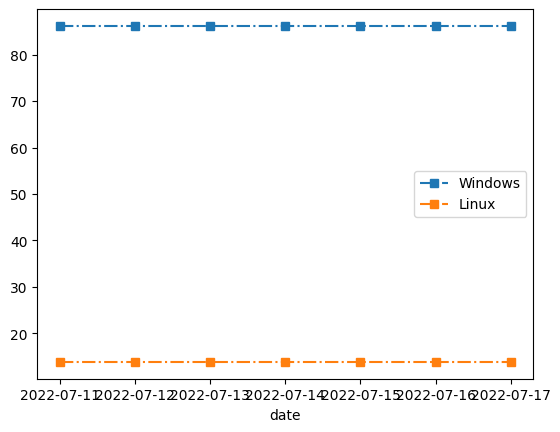

In [9]:
data_operating_systems_for_bar_chart = pd.read_json("data/data_operating_systems_for_bar_chart.json")["data"]
Visualization.create_bar_diagram(data_operating_systems_for_bar_chart)